<a href="https://colab.research.google.com/github/damianmtz98/Datos_Masivos_MCD/blob/main/P4_Muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muestreo de Datos en el Conjunto de Datos de Animes

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
reader = pd.read_csv('animedf.csv', chunksize=10000)
df = next(reader)
columnas = df.columns


In [58]:
df.head()

,id_anime,Name,Score,Genres,Type,Episodes,Aired,Studios,Source,Rank,Popularity,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,41,43,914193
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1,"Sep 1, 2001",Bones,Original,189,602,206248
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,328,246,356739
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26,"Jul 3, 2002 to Dec 25, 2002",Sunrise,Original,2764,1795,42829
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Toei Animation,Manga,4240,5126,6413


In [59]:
for columna in columnas:
    print(columna)

id_anime
Name
Score
Genres
Type
Episodes
Aired
Studios
Source
Rank
Popularity
Scored By


Distribución de Géneros:
 Comedy           7142
Fantasy          5306
UNKNOWN          4929
Action           4730
Adventure        3842
Sci-Fi           3091
Drama            2836
Romance          2063
Slice of Life    1755
Supernatural     1494
Hentai           1486
Mystery           847
Avant Garde       804
Ecchi             795
Sports            771
Horror            534
Suspense          242
Award Winning     241
Boys Love         169
Gourmet           146
Girls Love        113
Erotica            54
Name: Genres, dtype: int64


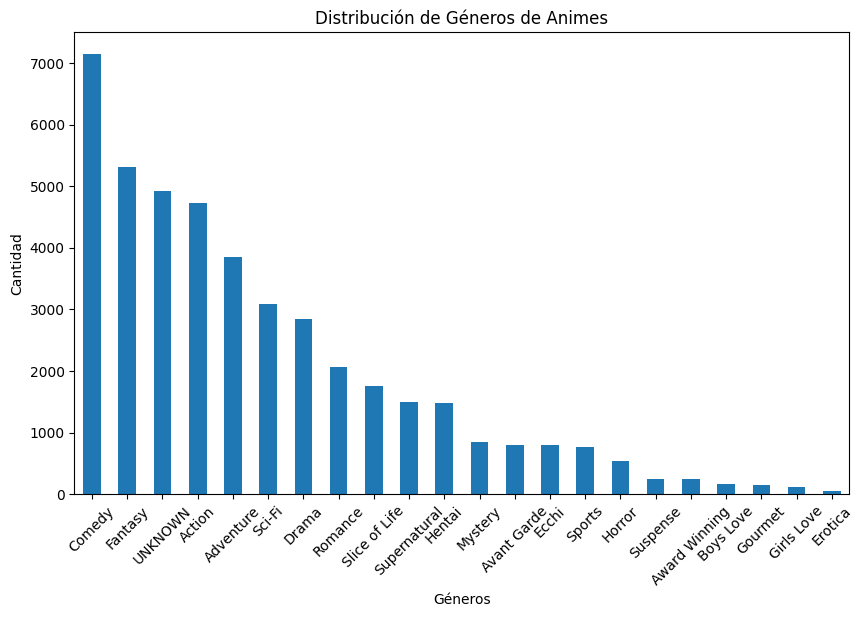

In [60]:
df = pd.read_csv('animedf.csv')

genres_count = df['Genres'].str.split(', ').explode().value_counts()
print("Distribución de Géneros:\n", genres_count)

plt.figure(figsize=(10, 6))
genres_count.plot(kind='bar')
plt.xlabel('Géneros')
plt.ylabel('Cantidad')
plt.title('Distribución de Géneros de Animes')
plt.xticks(rotation=45)
plt.show()


In [62]:
# Análisis estadístico del puntaje de los animes
score_mean = df['Score'].mean()
score_median = df['Score'].median()
score_std = df['Score'].std()

print("Estadísticas del Puntaje de los Animes:")
print("Media:", score_mean)
print("Mediana:", score_median)
print("Desviación Estándar:", score_std)

Estadísticas del Puntaje de los Animes:
Media: 6.055889178879743
Mediana: 6.24
Desviación Estándar: 1.9414501413599765


In [67]:
# Muestreo probabilístico por Clusters
from sklearn.utils import resample

In [68]:
x = df.drop('id_anime', axis=1)
y = df['id_anime']

In [37]:
#muestreo probabilístico por clusters
X_resampled, y_resampled = resample(X, y,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=42,
                                    stratify=y)

In [73]:
# Muestreo No Probabilístico con Propósito
df_resampled_2 = df[df["Popularity"] < 1500]
df_resampled_2

,id_anime,Name,Score,Genres,Type,Episodes,Aired,Studios,Source,Rank,Popularity,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26,"Apr 3, 1998 to Apr 24, 1999",Sunrise,Original,41,43,914193
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1,"Sep 1, 2001",Bones,Original,189,602,206248
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26,"Apr 1, 1998 to Sep 30, 1998",Madhouse,Manga,328,246,356739
5,15,Eyeshield 21,7.92,Sports,TV,145,"Apr 6, 2005 to Mar 19, 2008",Gallop,Manga,688,1252,86524
6,16,Hachimitsu to Clover,8.00,"Comedy, Drama, Romance",TV,24,"Apr 15, 2005 to Sep 27, 2005",J.C.Staff,Manga,589,862,81747
...,...,...,...,...,...,...,...,...,...,...,...,...
24899,55730,Energy,10.00,Avant Garde,Music,1,"Feb 11, 2015",UNKNOWN,Original,0,0,UNKNOWN
24901,55732,Bu Xing Si: Yuan Qi,6.00,"Action, Adventure, Fantasy",ONA,18,"Jul 27, 2023 to ?",UNKNOWN,Web novel,0,0,UNKNOWN
24902,55733,Di Yi Xulie,8.00,"Action, Adventure, Fantasy, Sci-Fi",ONA,16,"Jul 19, 2023 to ?",UNKNOWN,Web novel,0,0,UNKNOWN
24903,55734,Bokura no Saishuu Sensou,1.00,UNKNOWN,Music,1,"Apr 23, 2022",UNKNOWN,Original,0,0,UNKNOWN


In [42]:
# Muestreo No Probabilístico con Cuotas
import random

cuotas = {
    'Genres': {'Action': 40, 'Comedy': 30, 'Drama': 30},
    'Type': {'TV': 50, 'Movie': 30, 'OVA': 20},
    # Agrega las cuotas para las otras variables...
}

muestra_cuotas = []

In [43]:
# Función para verificar si se han cumplido las cuotas para todas las variables
def cumplir_cuotas(muestra_cuotas, cuotas):
    for variable, categorias in cuotas.items():
        for categoria, cuota in categorias.items():
            if sum(1 for row in muestra_cuotas if row[variable] == categoria) >= cuota:
                return True
    return False

contador_datos = 0

In [46]:
# Realizar el muestreo por cuota hasta alcanzar al menos 1000 datos
while contador_datos < 1000:
    for _, row in df.iterrows():
        participante = {
            'id_anime': row['id_anime'],
            'Name': row['Name'],
            'Score': row['Score'],
            'Genres': row['Genres'],
            'Type': row['Type'],
            'Episodes': row['Episodes'],
            'Aired': row['Aired'],
            'Studios': row['Studios'],
            'Source': row['Source'],
            'Rank': row['Rank'],
            'Popularity': row['Popularity'],
            'Scored By': row['Scored By']
        }
        muestra_cuotas.append(participante)
        contador_datos += 1

        if cumplir_cuotas(muestra_cuotas, cuotas) and contador_datos >= 1000:
            break


In [ ]:

# Crear DataFrames para las muestras obtenidas
df_resampled = pd.DataFrame(X_resampled)
df_resampled.head
df_muestra_cuotas = pd.DataFrame(muestra_cuotas)
df_muestra_cuotas.head


In [48]:
print("Estadísticas del Muestreo Probabilístico por Clusters:")
print(df_resampled["Popularity"].mean())
print(df_resampled["Popularity"].std())
print("Estadísticas del Muestreo No Probabilístico con Cuotas:")
print(df_muestra_cuotas["Popularity"].mean())
print(df_muestra_cuotas["Popularity"].std())


Estadísticas del Muestreo Probabilístico por Clusters:
8425.636
4932.374975648587
Estadísticas del Muestreo No Probabilístico con Cuotas:
4182.485
2632.3550065778845
